 # Plotting Backgrounds

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as kfp
import scipy.integrate as integrate

import datautilities


In [34]:
allbkg = {
    "Bi210": kfp.read_csv("bkgs/Bi210.csv", header=None),
    "C11": kfp.read_csv("bkgs/C11.csv", header=None),
    "C14": kfp.read_csv("bkgs/C14.csv", header=None),
    "Kr85": kfp.read_csv("bkgs/Kr85.csv", header=None),
    "Po210": kfp.read_csv("bkgs/Po210.csv", header=None),
    "Pile Up": kfp.read_csv("bkgs/pile_up.csv", header=None),
    "Ext Bkg 1": kfp.read_csv("bkgs/ext_bkg_1.csv", header=None),
    "Ext Bkg 2" : kfp.read_csv("bkgs/ext_bkg_2.csv", header=None),
    "Ext Bkg 3": kfp.read_csv("bkgs/ext_bkg_3.csv", header=None),

    "B8" : kfp.read_csv("bkgs/solar n/B8.csv", header=None),
    "Be7" : kfp.read_csv("bkgs/solar n/Be7.csv", header=None),
    "CNO" : kfp.read_csv("bkgs/solar n/CNO.csv", header=None),
    "Pep" : kfp.read_csv("bkgs/solar n/pep.csv", header=None),
    "Pp" : kfp.read_csv("bkgs/solar n/pp.csv", header=None)

}


Text(0.5, 1.0, 'Background')

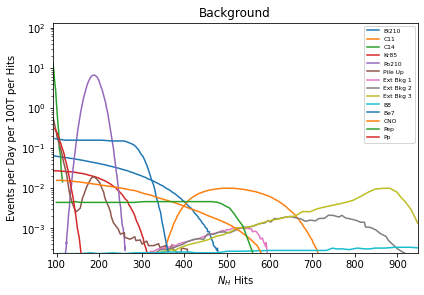

In [35]:
for source in allbkg:
    plt.plot(allbkg[source][0], allbkg[source][1], label=source)

plt.ylabel('Events per Day per 100T per Hits')
plt.xlabel('$N_{H}$ Hits')

plt.xlim([min(allbkg["C14"][0]), max(allbkg["Ext Bkg 3"][0])])
plt.ylim([min(allbkg["Po210"][1]), max(allbkg["C14"][1])*10 ])
plt.yscale('log')

plt.legend(prop={'size' : 6})
plt.tight_layout()
plt.title('Background')

Processing Background Data w/ Min and Max Hits

In [38]:
def pdintegratedict(dictdata, minh, maxh):
    total = 0
    for entry in dictdata:
        templistx = dictdata[entry][0]
        templisty = dictdata[entry][1]

        print(templistx)
        print(templisty)

        indexInRange = np.where((templistx >= minh) & (templistx <= maxh))[0]

        #
        print("Index of Range :" + str(indexInRange))
        print("Index of Range last index:" + str(indexInRange[-1]))

        #

        #total += integrate.simpson(templisty[indexInRange[0]: indexInRange[-1] + 1], templistx[indexInRange[0]: indexInRange[-1] + 1])
    return total

In [42]:
# Hits Corresponding to 300 KeV
minhits = 134.09523809523805

# Hits Corresponding to 500 KeV
maxhits = 211.42857142857142
datautilities.pdintegratedict(allbkg, minhits, maxhits)


IndexError: index 0 is out of bounds for axis 0 with size 0